<h1> Bay Wheels Data Exploration </h1>

<h2> By Tony Randrianavony </h2>

This dataset is the Bay Wheels (previously known as Ford GoBike) Dataset that includes information about individual rides make in a bike sharing system covering the greater San Francisco. In this investigation, I wanted to find characteristics and common behaviors between the users.  

In [ ]:
#import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from requests import get
from zipfile import ZipFile
import os
import glob
from io import BytesIO
%matplotlib inline
path = "C:\\Users\\Tony R"

In [2]:
#Upload first dataset into a dataframe 
df = pd.read_csv('2017-fordgobike-tripdata.csv')
#Quick overview of the dataframe
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
#Uploading the rest of the needed files
links = ["https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip", "https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip", "https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip", "https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip", "https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip", "https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip", "https://s3.amazonaws.com/baywheels-data/202004-baywheels-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/202005-baywheels-tripdata.csv.zip", "https://s3.amazonaws.com/baywheels-data/202006-baywheels-tripdata.csv.zip"]

for link in links:
    zipfile = get(link)
    with ZipFile(BytesIO(zipfile.content)) as file:
        file.extractall()

In [4]:
#Gathering all files into one
all_files = glob.glob(os.path.join(path + "/*.csv"))
all_csv = (pd.read_csv(f, sep=',',low_memory=False) for f in all_files)
df_merged  = pd.concat(all_csv, ignore_index=True)
df_merged.to_csv( "newdf.csv")

In [4]:
#Setting new dataframe and looking at its shape 
newdf = pd.read_csv('newdf.csv')
newdf.shape

(12352178, 27)

<h2> What is the structure of your dataset? </h2>

In [5]:
#Overview of the dataframe
newdf.sample(5).T

,1741761,7976352,6309224,3724743,2715842
Unnamed: 0,1741761,7976352,6309224,3724743,2715842
duration_sec,453,338,756,479,157
start_time,2018-09-28 16:36:19.8390,2018-09-19 20:47:19.7640,2017-11-14 18:27:29.3310,2019-07-14 11:27:18.7750,2019-02-07 19:17:33.4910
end_time,2018-09-28 16:43:53.1140,2018-09-19 20:52:57.7990,2017-11-14 18:40:05.4670,2019-07-14 11:35:18.2590,2019-02-07 19:20:11.3050
start_station_id,47,256,324,321,182
start_station_name,4th St at Harrison St,Hearst Ave at Euclid Ave,Union Square (Powell St at Post St),5th St at Folsom,19th Street BART Station
start_station_latitude,37.781,37.8751,37.7883,37.7801,37.809
start_station_longitude,-122.4,-122.261,-122.409,-122.403,-122.268
end_station_id,349,255,98,89,180
end_station_name,Howard St at Mary St,Virginia St at Shattuck Ave,Valencia St at 16th St,Division St at Potrero Ave,Telegraph Ave at 23rd St


Each trip from the dataframe is itemized by multiple categories. Where my main features of interest include the start and end time , the duration and the type of users. 

In [6]:
#Creating a new DataFrame to clean
df_clean = newdf.copy()

In [7]:
#Filling out the rows with no values because some columns have different names 
df_clean ['start_time'] = df_clean['start_time'].fillna(df_clean['started_at'])
df_clean ['end_time'] = df_clean['end_time'].fillna(df_clean['ended_at'])
df_clean ['start_station_latitude'] = df_clean['start_station_latitude'].fillna(df_clean['start_lat'])
df_clean ['start_station_longitude'] = df_clean['start_station_longitude'].fillna(df_clean['start_lng'])
df_clean ['end_station_latitude'] = df_clean['end_station_latitude'].fillna(df_clean['end_lat'])
df_clean ['end_station_longitude'] = df_clean['end_station_longitude'].fillna(df_clean['end_lng'])

In [8]:
#Deleting columns that are not needed

df_clean = df_clean.drop(['started_at', 'ended_at', 'start_lat','end_lat','start_lng','end_lat','end_lng'], axis=1)

df_clean = df_clean.drop(['ride_id', 'rideable_type', 'member_casual'], axis=1)

In [9]:
#Overview of DataFrame
df_clean.sample(5).T

,9112353,6356543,8230870,4155384,3675139
Unnamed: 0,9112353,6356543,8230870,4155384,3675139
duration_sec,1455,436,216,146,352
start_time,2019-03-12 08:27:17.9620,2017-11-01 11:43:59.5740,2018-10-10 10:04:53.3010,2019-09-23 11:54:53.5820,2019-07-23 08:53:46.2720
end_time,2019-03-12 08:51:33.8060,2017-11-01 11:51:16.2780,2018-10-10 10:08:29.7890,2019-09-23 11:57:19.8090,2019-07-23 08:59:39.1750
start_station_id,138,6,20,47,270
start_station_name,Jersey St at Church St,The Embarcadero at Sansome St,Mechanics Monument Plaza (Market St at Bush St),4th St at Harrison St,Ninth St at Heinz Ave
start_station_latitude,37.7509,37.8048,37.7913,37.781,37.8535
start_station_longitude,-122.427,-122.403,-122.399,-122.4,-122.289
end_station_id,21,16,3,465,263
end_station_name,Montgomery St BART Station (Market St at 2nd St),Steuart St at Market St,Powell St BART Station (Market St at 4th St),San Francisco Caltrain Station (King St at 4th...,Channing Way at San Pablo Ave


In [10]:
#Checking for wrong data types
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12352178 entries, 0 to 12352177
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   duration_sec             float64
 2   start_time               object 
 3   end_time                 object 
 4   start_station_id         float64
 5   start_station_name       object 
 6   start_station_latitude   float64
 7   start_station_longitude  float64
 8   end_station_id           float64
 9   end_station_name         object 
 10  end_station_latitude     float64
 11  end_station_longitude    float64
 12  bike_id                  float64
 13  user_type                object 
 14  bike_share_for_all_trip  object 
 15  rental_access_method     object 
 16  is_equity                object 
 17  Unnamed: 0.1             float64
dtypes: float64(9), int64(1), object(8)
memory usage: 1.7+ GB


In [11]:
#Fixing columns that have wrong data types
df_clean['start_time'] = df_clean['start_time'].astype('datetime64[ns]')
df_clean['end_time'] = df_clean['end_time'].astype('datetime64[ns]')
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)
df_clean['user_type'] = df_clean['user_type'].astype('category')

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12352178 entries, 0 to 12352177
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   duration_sec             float64       
 2   start_time               datetime64[ns]
 3   end_time                 datetime64[ns]
 4   start_station_id         object        
 5   start_station_name       object        
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   end_station_id           object        
 9   end_station_name         object        
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
 12  bike_id                  object        
 13  user_type                category      
 14  bike_share_for_all_trip  object        
 15  rental_access_method     object        
 16  is_equity                object        
 17  Unnamed: 0.1             

In [13]:
#Fixing duration that has missing values
df_clean['duration_sec'] = df_clean['duration_sec'].fillna((df_clean['end_time']-df_clean['start_time']).dt.total_seconds())

In [14]:
#Making sure there is no more missing values 
df_clean.sample(5).T

,7112958,1783295,1591214,6560276,6464217
Unnamed: 0,7112958,1783295,1591214,6560276,6464217
duration_sec,1086,625,390,456,844
start_time,2018-04-08 11:14:08.777000,2018-09-22 12:40:55.427000,2018-08-23 09:23:01.988000,2017-09-03 11:10:33.524000,2017-10-02 08:33:00.112000
end_time,2018-04-08 11:32:14.910000,2018-09-22 12:51:20.567000,2018-08-23 09:29:32.932000,2017-09-03 11:18:09.829000,2017-10-02 08:47:04.719000
start_station_id,183.0,107.0,15.0,58.0,66.0
start_station_name,Telegraph Ave at 19th St,17th St at Dolores St,San Francisco Ferry Building (Harry Bridges Pl...,Market St at 10th St,3rd St at Townsend St
start_station_latitude,37.8087,37.763,37.7954,37.7766,37.7787
start_station_longitude,-122.27,-122.426,-122.394,-122.417,-122.393
end_station_id,210.0,58.0,28.0,45.0,14.0
end_station_name,45th St at Manila,Market St at 10th St,The Embarcadero at Bryant St,5th St at Howard St,Clay St at Battery St


In [15]:
#Checking for negative duration 
df_clean[df_clean['duration_sec'] < 0]

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,is_equity,Unnamed: 0.1
5816986,5816986,-12.0,2020-04-18 19:42:31,2020-04-18 19:42:19,454.0,7th Ave at Cabrillo St,37.775200,-122.465000,370.0,Jones St at Post St,37.787300,-122.413300,nan,NaN,NaN,NaN,NaN,NaN
5831369,5831369,-11.0,2020-04-29 17:26:34,2020-04-29 17:26:23,21.0,Montgomery St BART Station (Market St at 2nd St),37.789600,-122.400800,3.0,Powell St BART Station (Market St at 4th St),37.786400,-122.404900,nan,NaN,NaN,NaN,NaN,NaN
5832002,5832002,-20.0,2020-04-29 15:41:36,2020-04-29 15:41:16,84.0,Duboce Park,37.769200,-122.433800,125.0,20th St at Bryant St,37.759200,-122.409900,nan,NaN,NaN,NaN,NaN,NaN
5832575,5832575,-8.0,2020-04-24 18:07:09,2020-04-24 18:07:01,196.0,Grand Ave at Perkins St,37.808900,-122.256500,177.0,MacArthur Blvd at Telegraph Ave,37.826300,-122.265100,nan,NaN,NaN,NaN,NaN,NaN
5832951,5832951,-8.0,2020-04-25 11:38:08,2020-04-25 11:38:00,27.0,Beale St at Harrison St,37.788100,-122.391900,400.0,Buchanan St at North Point St,37.804300,-122.433500,nan,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12342386,12342386,-14.0,2020-06-05 15:36:17,2020-06-05 15:36:03,461.0,Terry Francois Blvd at Mission Bay Blvd N,37.771329,-122.386622,461.0,Terry Francois Blvd at Mission Bay Blvd N,37.771330,-122.386622,nan,NaN,NaN,NaN,NaN,6166297.0
12346948,12346948,-28.0,2020-06-29 08:12:08,2020-06-29 08:11:40,375.0,Grove St at Masonic Ave,37.774836,-122.446545,13.0,Commercial St at Montgomery St,37.794231,-122.402923,nan,NaN,NaN,NaN,NaN,6170859.0
12347699,12347699,-6.0,2020-06-06 13:28:28,2020-06-06 13:28:22,66.0,3rd St at Townsend St,37.778741,-122.392740,461.0,Terry Francois Blvd at Mission Bay Blvd N,37.771330,-122.386622,nan,NaN,NaN,NaN,NaN,6171610.0
12347758,12347758,-12.0,2020-06-20 14:13:17,2020-06-20 14:13:05,178.0,Broadway at 30th St,37.819381,-122.261928,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,nan,NaN,NaN,NaN,NaN,6171669.0


In [16]:
#Making all durations positive
df_clean['duration_sec'] = df_clean['duration_sec'].abs()

In [17]:
#Double checking 
df_clean[df_clean['duration_sec'] < 0]

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,is_equity,Unnamed: 0.1


<h1>Univariate Eploration </h1>

In this section, I will investigate distributions of individual variables.

<h3> User Types </h3>

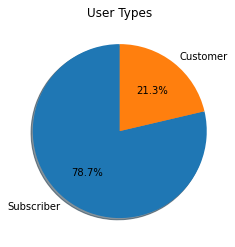

In [18]:
#Distribution of type of users
data = df_clean['user_type'].value_counts()/df_clean['user_type'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', shadow = 'True' , startangle = 90)
plt.title('User Types');

We can observe that almost 3/4 of the customers are subscribers.

<h3> Duration Of Rides </h3>

In [54]:
#Looking at the duration statistics
df_clean['duration_sec'].describe()

count    1.235218e+07
mean     9.058074e+02
std      6.130849e+03
min      0.000000e+00
25%      3.630000e+02
50%      5.810000e+02
75%      9.180000e+02
max      3.283732e+06
Name: duration_sec, dtype: float64

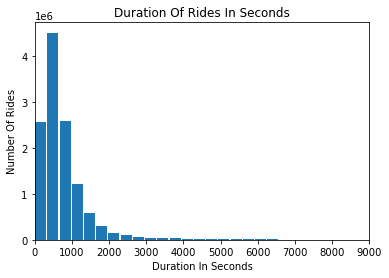

In [55]:
#Distribution of duration of rides
data = df_clean['duration_sec']
plt.hist(data , bins = 10000 , rwidth=.9)
plt.xlim(0,9000)
plt.title('Duration Of Rides In Seconds')
plt.xlabel('Duration In Seconds')
plt.ylabel('Number Of Rides');

From the statistics, we can observe that there are outliers in the duration of rides due to the maximum duration being an extremely high number. By looking at the graph we can conclude that the majority of the rides are under 16 minutes. 

<h3> Number Of Rides By Different Measures Of Time

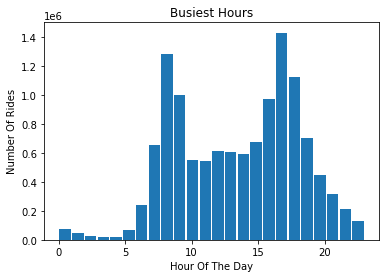

In [21]:
#Distribution of number of rides by hours of the day
data = df_clean['start_time'].dt.hour
plt.hist(data,rwidth=.9, bins = 24)
plt.title('Busiest Hours')
plt.xlabel('Hour Of The Day')
plt.ylabel('Number Of Rides');

As expected the distribution is bimodal. The two peaks are during the normal rush hours of a day. The first between the hours of 7AM and 9AM when people are going to work. And the second peak is between the hours of 4PM and 6PM when people are getting off of work.

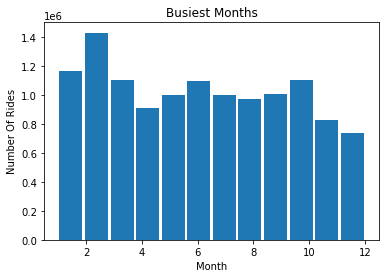

In [51]:
#Distribution of rides per months
data = df_clean['start_time'].dt.month
plt.hist(data,rwidth=.9, bins = 12)
plt.title('Busiest Months')
plt.xlabel('Month')
plt.ylabel('Number Of Rides');

According to the distribution the busiest month has been February. Where the lowest have been November and December. Which could be due to less people at work due to the holidays. We will check this distribution by year later on. 

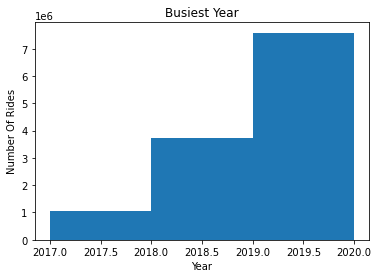

In [23]:
#Distribution of rides per year
data = df_clean['start_time'].dt.year
plt.hist(data, bins = 3)
plt.title('Busiest Year')
plt.xlabel('Year')
plt.ylabel('Number Of Rides');

We can observe a gradual increase of rides throughout the years which is very positive to continue business. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


Most of the distributions we found were expected. From the majority users being subscribers, to the busiest hours being during the rush hour time of the day and how business has gradually increased every year. 
The unusual point we have found however is the distribution of rides when we look at each month. I did not expect the busiest month to be February. Which is something I look at a little bit deeper later on. 
There was no need to perform any transformations. 

<h1> Bivariate Exploration </h1>

In this section I will investigate relationships between pairs of variables in our data.

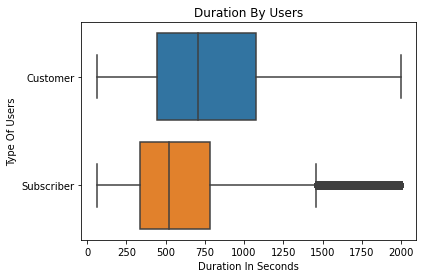

In [24]:
#Distribution of the duration by users
majority = df_clean[df_clean['duration_sec'] < 2000]
sns.boxplot(data =majority , y='user_type', x='duration_sec')
plt.title('Duration By Users')
plt.xlabel('Duration In Seconds')
plt.ylabel('Type Of Users');


The distribution shows us that customers on average take a longer trip than subscribers. 

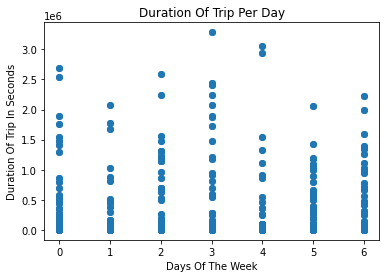

In [46]:
#Distribution of duration trips per day
df_clean['daysofweek'] = df_clean['start_time'].dt.dayofweek

plt.scatter(data = df_clean , x = 'daysofweek' , y='duration_sec')
plt.title('Duration Of Trip Per Day')
plt.xlabel('Days Of The Week')
plt.ylabel('Duration Of Trip In Seconds');


The distrution is not as expected. Thursday seem like the day where people take the longest trips. And the weekends are the days where people take the shortest trips on average. 

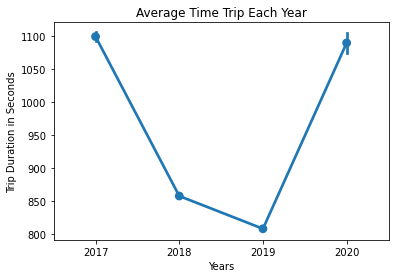

In [26]:
#Distribution of duration of trips by year
df_clean['year'] = df_clean['start_time'].dt.year
ax = sns.pointplot(data=df_clean, x='year' , y='duration_sec')
plt.xlabel('Years')
plt.ylabel('Trip Duration in Seconds')
plt.title('Average Time Trip Each Year');

The distribution is a little bit of a worry considering that the duration has not been consistent. This year has been a good year so far however. The longer the trips are, the more money the company gets of course.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the distribution I have seen that the subscribers on average take shorter trip. A reason might be because these subscribers are people that work in the city and only take the bike for the convenience. Whereas a customer might be tourists
that are sightseeing and would then travel longer distances. <p>
And the duration throughout the years has not been consistent with the year of 2018 and 2019 being the lowest so far. 

<h1> Multivariate Exploration </h1>

In this section I will create plots of three or more variables to investigate the data even further.

<Figure size 720x288 with 0 Axes>

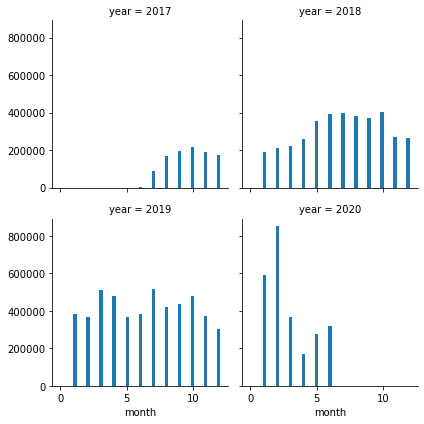

In [56]:
#Distribution of rides by months and year
df_clean['month'] = df_clean['start_time'].dt.month
g = sns.FacetGrid (data = df_clean, col='year', col_wrap=2)
bins = np.linspace(0,12)
g.map(plt.hist, "month" , bins=bins);

We have seen in the previous distribution that February has been the busiest month. This might be due to the strong February for this year that squewed the distribution. When you compare the year of 2018 and 2019 you do see that the most popular months are during the summer and the least popular months are at the end of the year. 

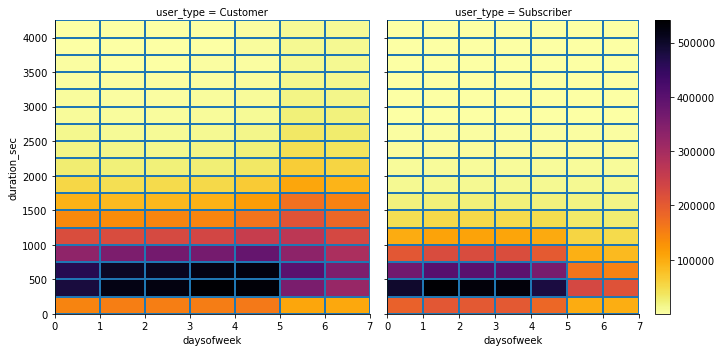

In [60]:
#Distribution of the duration per trip in the week by subscribers
xbin = np.arange(0,7+1,1)
ybin = np.arange(0,4200+250,250)

g = sns.FacetGrid (data = df_clean , col='user_type', height=5)
g.map(plt.hist2d, 'daysofweek', 'duration_sec', cmin=0.5, cmap = 'inferno_r', bins=[xbin,ybin])
plt.colorbar();

From this heatmap we can similarities between customers and subscribers. We can see that both have an average of 4 and 12 min rides during the week. However customers are not only more present during the weekend they take longer trips as well. 

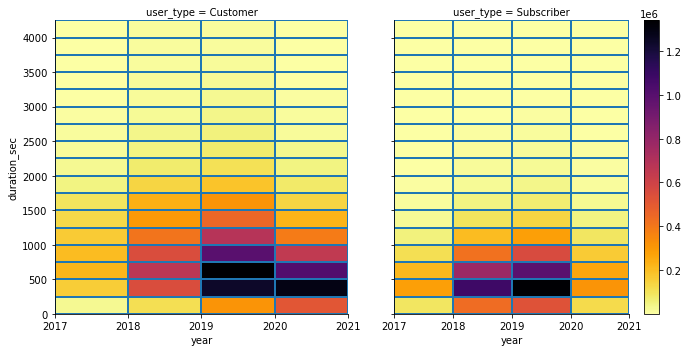

In [28]:
#Distribution of the duration per trip by years and subscribers
df_clean['year'] = df_clean['start_time'].dt.year
xbin = np.arange(2017,2021+1,1)
ybin = np.arange(0,4200+250,250)

g = sns.FacetGrid (data = df_clean , col='user_type', height=5)
g.map(plt.hist2d, 'year', 'duration_sec', cmin=0.5, cmap = 'inferno_r', bins=[xbin,ybin])
ticks = [2017,2018,2019,2020,2021]
g.set(xticks = ticks, xticklabels = ticks);
plt.colorbar();

From the heatmap we see an abnormal trend. We do see that the duration for customers is higher than for the subscribers. However, for the year of 2020 it seems that subscribers have used the bikes a lot less compared to the customers. This might be because of covid-19 where people have worked from home a lot more. 

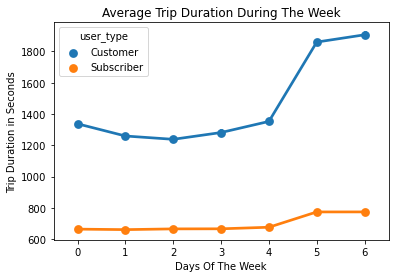

In [29]:
#Distribution of duration for a trip by days and user types
ax = sns.pointplot(data=df_clean, x='daysofweek' , y='duration_sec', hue='user_type')
plt.xlabel('Days Of The Week')
plt.ylabel('Trip Duration in Seconds')
plt.title('Average Trip Duration During The Week');

This graph is as expected where the duration for a trip is longer during the weekends than weekdays. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

We have seen that customers take longer rides from subscribers. Because most customers are tourists and will travel longer distances to the see the city. What was abnormal was the distribution for the year of 2020, where it seemed that customers were more active than subscribers. Which might be due to the health climate of the world in the past couple months.   